In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import torch.nn.functional as F

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


Using cuda device


In [3]:
mat = scipy.io.loadmat('notMNIST_small.mat')
mat.keys()


dict_keys(['__header__', '__version__', '__globals__', 'images', 'labels'])

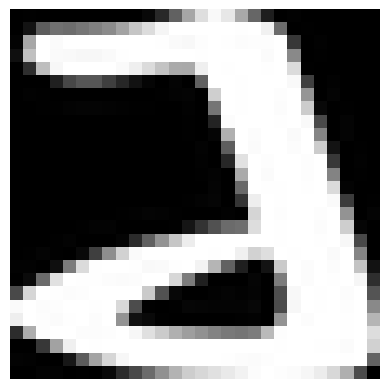

In [4]:
mat['images'].shape

plt.imshow(mat['images'][:, :, 1], cmap='gray')
plt.axis('off')
plt.show()

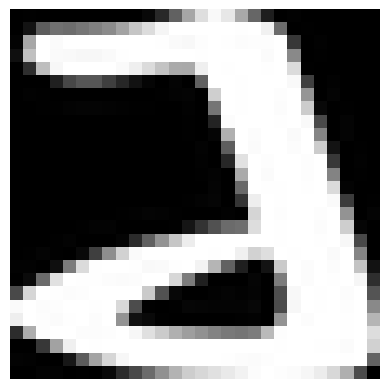

(18724, 28, 28)

In [5]:
new_img = np.random.rand(18724, 28, 28)
for index in range(mat['images'].shape[2]):
    new_img[index] = mat['images'][:,:,index]

plt.imshow(new_img[1, :, :], cmap='gray')
plt.axis('off')
plt.show()

new_img.shape

In [6]:
indices = np.arange(18724)
np.random.shuffle(indices)
labels = np.array(mat['labels'])


shuffled_images = new_img[indices]
shuffled_labels = labels[indices]

In [7]:
x_train_img = np.array(shuffled_images[0:11234, :,:])
x_test_img = np.array(shuffled_images[11235:18724, :,:])
y_train_label = np.array(shuffled_labels[0:11234])
y_test_label =np.array(shuffled_labels[11235:18724])

x_train_img.shape

(11234, 28, 28)

In [8]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):

        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

 
        image = torch.tensor(image, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)

        return image, label

In [9]:
test_images = x_test_img
test_labels = y_test_label

test_dataset = CustomDataset(test_images, test_labels)

test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [10]:
from torch.utils.data import DataLoader

images = x_train_img
labels = y_train_label

custom_dataset = CustomDataset(images, labels)

data_loader = DataLoader(dataset=custom_dataset, batch_size=32, shuffle=True)


In [11]:
class SimpleCNN_x(nn.Module):
    def __init__(self, num_classes=10):  
        super(SimpleCNN_x, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout2d(p=0.2)
        self.fc1 = nn.Linear(3136, 128)  
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x1 = F.relu(self.conv1(x))
        x2 = F.relu(self.conv2(x1))
        x3 = self.pool(x2)
        x3 = self.dropout(x3)
        x4 = self.pool(F.relu(self.conv3(x3)))
        x4 = self.dropout(x4)
        x5 = x4.view(x4.size(0), -1)  
        x6 = F.relu(self.fc1(x5))
        x6 = self.dropout(x6)
        out = self.fc2(x6)
        return x1, x2, out


C:\Users\denis\AppData\Local\Temp\ipykernel_15604\691292828.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)
c:\Users\denis\anaconda3\lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1/25, Step 100/352, Loss: 0.54400
Epoch 1/25, Step 200/352, Loss: 0.34274
Epoch 1/25, Step 300/352, Loss: 0.18955
Epoch 2/25, Step 100/352, Loss: 0.34882
Epoch 2/25, Step 200/352, Loss: 0.42302
Epoch 2/25, Step 300/352, Loss: 0.51943
Epoch 3/25, Step 100/352, Loss: 0.25009
Epoch 3/25, Step 200/352, Loss: 0.38647
Epoch 3/25, Step 300/352, Loss: 0.08243
Epoch 4/25, Step 100/352, Loss: 0.44753
Epoch 4/25, Step 200/352, Loss: 0.08448
Epoch 4/25, Step 300/352, Loss: 0.35433
Epoch 5/25, Step 100/352, Loss: 0.07144
Epoch 5/25, Step 200/352, Loss: 0.36377
Epoch 5/25, Step 300/352, Loss: 0.07289
Epoch 6/25, Step 100/352, Loss: 0.35876
Epoch 6/25, Step 200/352, Loss: 0.64567
Epoch 6/25, Step 300/352, Loss: 0.35277
Epoch 7/25, Step 100/352, Loss: 0.05303
Epoch 7/25, Step 200/352, Loss: 0.09329
Epoch 7/25, Step 300/352, Loss: 0.12286
Epoch 8/25, Step 100/352, Loss: 0.23735
Epoch 8/25, Step 200/352, Loss: 0.09011
Epoch 8/25, Step 300/352, Loss: 0.17724
Epoch 9/25, Step 100/352, Loss: 0.21676


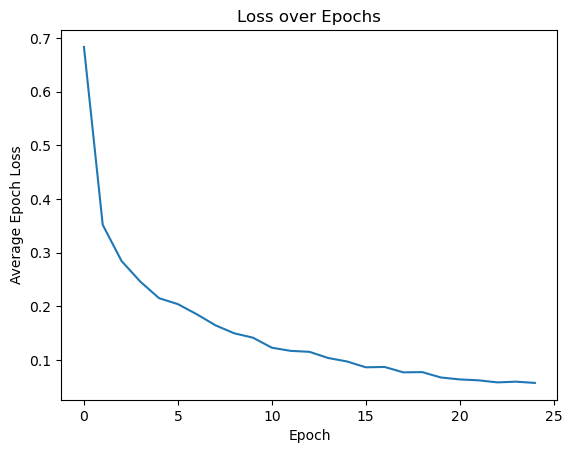

In [12]:
mdlx = SimpleCNN_x(num_classes=10) 
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(mdlx.parameters(), lr=0.001, momentum=0.8)

mdlx = mdlx.to(device)

num_epochs = 25  
epoch_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0
    num_batches = 0

    for i, (images, labels) in enumerate(data_loader):
        images, labels = images.to(device), labels.to(device)
        images = images.unsqueeze(1)
        
        x1, x2, outputs = mdlx(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        num_batches += 1

        if (i+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Step {i+1}/{len(data_loader)}, Loss: {loss.item():.5f}')

    epoch_loss /= num_batches
    epoch_losses.append(epoch_loss)

plt.plot(epoch_losses)
plt.ylabel('Average Epoch Loss')
plt.xlabel('Epoch')
plt.title('Loss over Epochs')
plt.show()


In [13]:
def test_model_x(mdlx, test_loader):
    mdlx = mdlx.to(device)
    
    mdlx.eval() 
    correct = 0
    total = 0
    with torch.no_grad():  
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            images = images.unsqueeze(1)  
            x1, x2, outputs = mdlx(images)
            _, predicted = torch.max(outputs.data, 1)  
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')


test_model_x(mdlx, test_loader)

C:\Users\denis\AppData\Local\Temp\ipykernel_15604\691292828.py:23: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


Accuracy: 94.41%
